In [ ]:
!pip install prov[dot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import prov.model as prov
from prov.model import ProvDocument, Namespace, Literal, PROV, Identifier
import datetime
d1 = ProvDocument()  # d1 is now an empty provenance document

In [ ]:
# Declaring namespaces for various prefixes 
d1.add_namespace('prov', 'http://www.w3.org/ns/prov#')
d1.add_namespace('foaf', 'http://xmlns.com/foaf/0.1/')
d1.add_namespace('base', 'http://www.RDorg.it/')
d1.add_namespace('user', 'http://www.RDorg.it/people/')

<Namespace: user {http://www.RDorg.it/people/}>

In [ ]:
#Declaring agents
ag1 = d1.agent ('base:Universitätsspital_Basel', {'prov:type':'Organization'})
ag2 = d1.agent ('base:Cardiac_surgery_and_engineering_group', {'prov:type':'Organization'})

In [ ]:
#Declaring responsibilities
d1.actedOnBehalfOf (ag2, ag1)

<ProvDelegation: (base:Cardiac_surgery_and_engineering_group, base:Universitätsspital_Basel)>

In [ ]:
#Declaring entities
e1 = d1.entity ('base:Sample')
e2 = d1.entity ('base:Isolated_cells')
e3 = d1.entity ('base:Expanded_cell_culture')
e4 = d1.entity ('base:Scaffold')
e5 = d1.entity ('base:3D_construct')
e6 = d1.entity ('base:Mature_tissue')
e7 = d1.entity ('base:Biological_data')

e8 = d1.entity ('base:Growth_factors_and_other_regulatory_molecules')

e9 = d1.entity ('base:Isolation_and_expansion_protocol', {'prov:type':'Plan'})
e10 = d1.entity ('base:Scaffold_preparation_protocol', {'prov:type':'Plan'})
e11 = d1.entity ('base:Bioreactor_preaparation_protocol', {'prov:type':'Plan'})
e12 = d1.entity ('base:Stimulation/manipulation_protocol', {'prov:type':'Plan'})

In [ ]:
#Declaring activities
a1 = d1.activity ('base:Cell_isolation')  
a2 = d1.activity ('base:Cell_expansion')   
a3 = d1.activity ('base:Scaffold_preparation') 
a4 = d1.activity ('base:Scaffold_seeding') 
a5 = d1.activity ('base:Bioreactor_manipulation_and_tissue_culture') 
a6 = d1.activity ('base:Read_out/Characterization') 
a7 = d1.activity ('base:Biological_studies')
a8 = d1.activity ('base:Biological_data_interpretation')

In [ ]:
#Declaring usage
d1.used (a1, e1)
d1.used (a1, e9)
d1.used (a2, e2)
d1.used (a2, e9)
d1.used (a3, e10)
d1.used (a4, e3)
d1.used (a4, e4)
d1.used (a5, e5)
d1.used (a5, e11)
d1.used (a5, e12)
d1.used (a5, e8)
d1.used (a6, e6)
d1.used (a7, e6)
d1.used (a8, e7)

<ProvUsage: (base:Biological_data_interpretation, base:Biological_data)>

In [ ]:
#Declaring generation
d1.wasGeneratedBy (e2, a1)
d1.wasGeneratedBy (e3, a2)
d1.wasGeneratedBy (e4, a3)
d1.wasGeneratedBy (e5, a4)
d1.wasGeneratedBy (e6, a5)
d1.wasGeneratedBy (e7, a6)
d1.wasGeneratedBy (e7, a7)

<ProvGeneration: (base:Biological_data, base:Biological_studies)>

In [ ]:
#Declaring attribution
d1.wasAttributedTo (e1, ag1)
d1.wasAttributedTo (e2, ag2)
d1.wasAttributedTo (e3, ag2)
d1.wasAttributedTo (e4, ag2)
d1.wasAttributedTo (e5, ag2)
d1.wasAttributedTo (e6, ag2)
d1.wasAttributedTo (e7, ag2)

<ProvAttribution: (base:Biological_data, base:Cardiac_surgery_and_engineering_group)>

In [ ]:
d1.wasAssociatedWith (a1, ag2)
d1.wasAssociatedWith (a2, ag2)
d1.wasAssociatedWith (a3, ag2)
d1.wasAssociatedWith (a4, ag2)
d1.wasAssociatedWith (a5, ag2)
d1.wasAssociatedWith (a6, ag2)
d1.wasAssociatedWith (a7, ag2)
d1.wasAssociatedWith (a8, ag2)

<ProvAssociation: (base:Biological_data_interpretation, base:Cardiac_surgery_and_engineering_group)>

In [ ]:
# visualize the graph
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
dot.write_png('Generic_tissue_engineering.png')

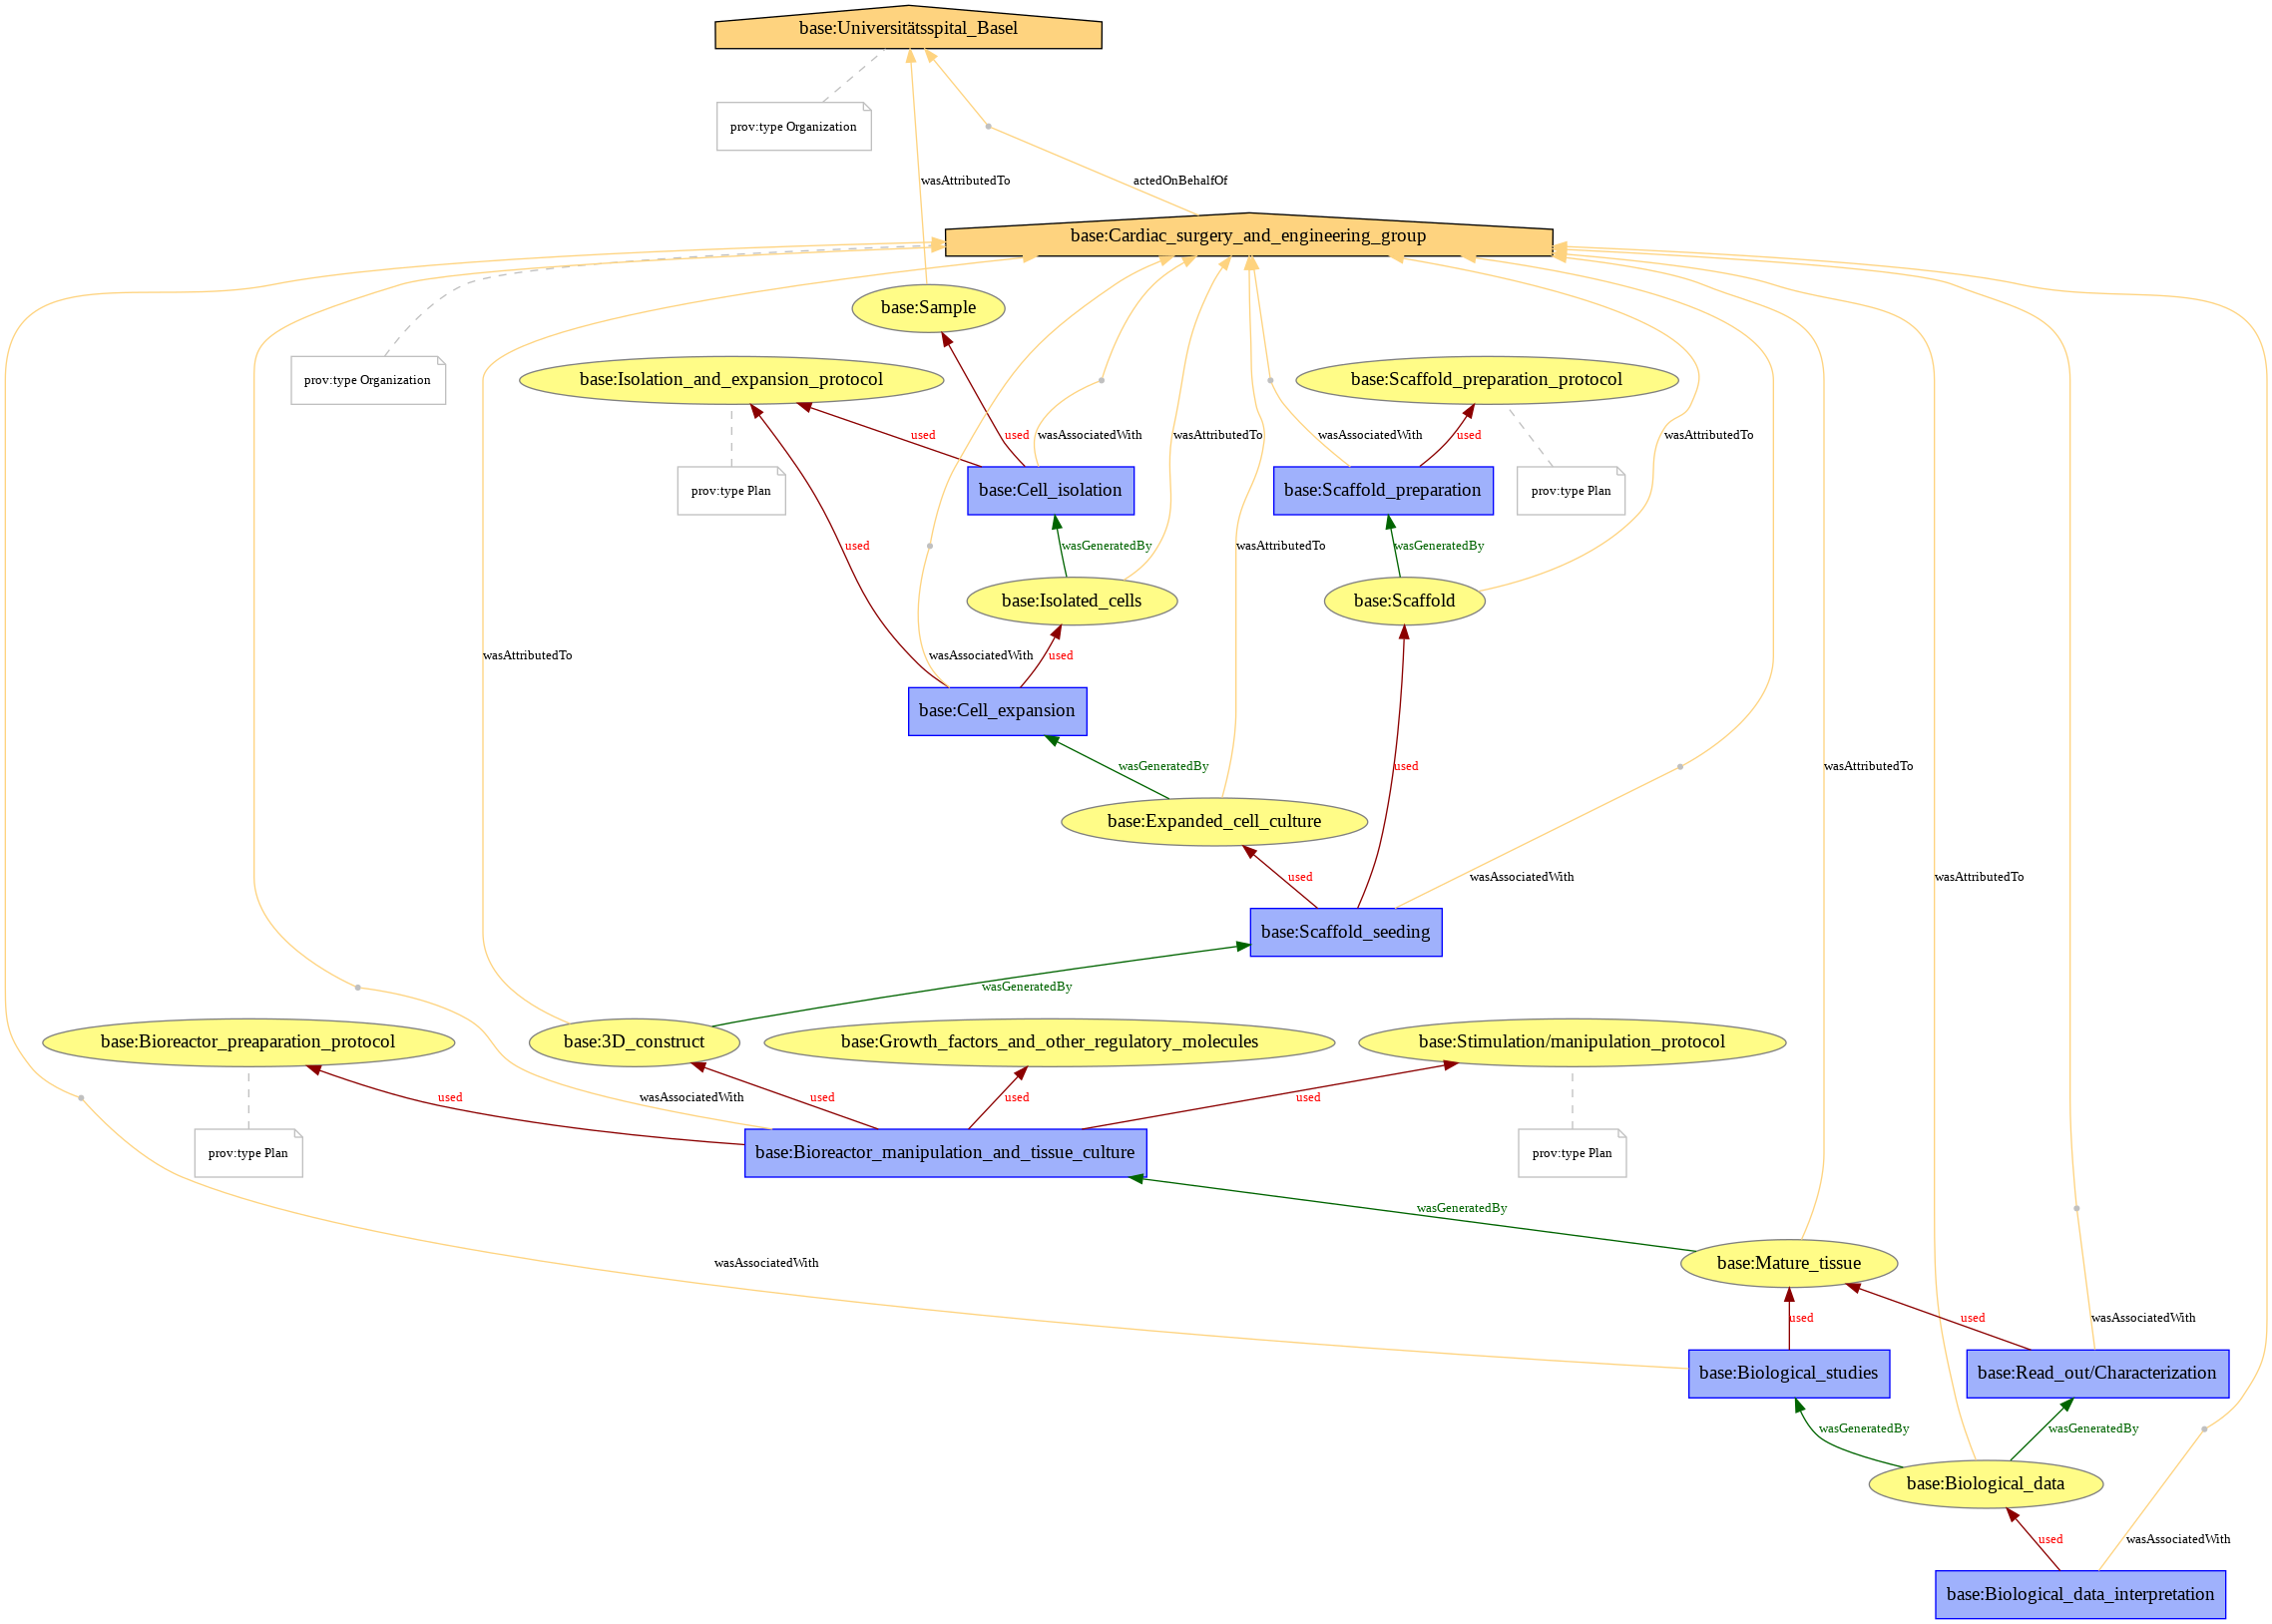

In [ ]:
# visualize the image
from IPython.display import Image 
Image('Generic_tissue_engineering.png')

In [ ]:
print(d1.get_provn())

document
  prefix foaf <http://xmlns.com/foaf/0.1/>
  prefix base <http://www.RDorg.it/>
  prefix user <http://www.RDorg.it/people/>
  
  agent(base:Universitätsspital_Basel, [prov:type="Organization"])
  agent(base:Cardiac_surgery_and_engineering_group, [prov:type="Organization"])
  actedOnBehalfOf(base:Cardiac_surgery_and_engineering_group, base:Universitätsspital_Basel, -)
  entity(base:Sample)
  entity(base:Isolated_cells)
  entity(base:Expanded_cell_culture)
  entity(base:Scaffold)
  entity(base:3D_construct)
  entity(base:Mature_tissue)
  entity(base:Biological_data)
  entity(base:Growth_factors_and_other_regulatory_molecules)
  entity(base:Isolation_and_expansion_protocol, [prov:type="Plan"])
  entity(base:Scaffold_preparation_protocol, [prov:type="Plan"])
  entity(base:Bioreactor_preaparation_protocol, [prov:type="Plan"])
  entity(base:Stimulation/manipulation_protocol, [prov:type="Plan"])
  activity(base:Cell_isolation, -, -)
  activity(base:Cell_expansion, -, -)
  activity(ba

In [ ]:
#Turtle (PROV-O)
d1.serialize('Generic_tissue_engineering.ttl', format='rdf', rdf_format='ttl')

In [ ]:
#XML (PROV-XML)
d1.serialize('Generic_tissue_engineering.xml', format='xml')